## Import and directories

In [24]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Manuscript/Figure_SI


In [27]:
#Run this once to run the .py(Analysis_bis.py) file.
os.chdir(r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis')
!python Analysis_bis.py
%run Analysis_bis.py

In [53]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Time traces

Time traces of $Zinc$ Azurin labeled with ATTO 655 at different potential.

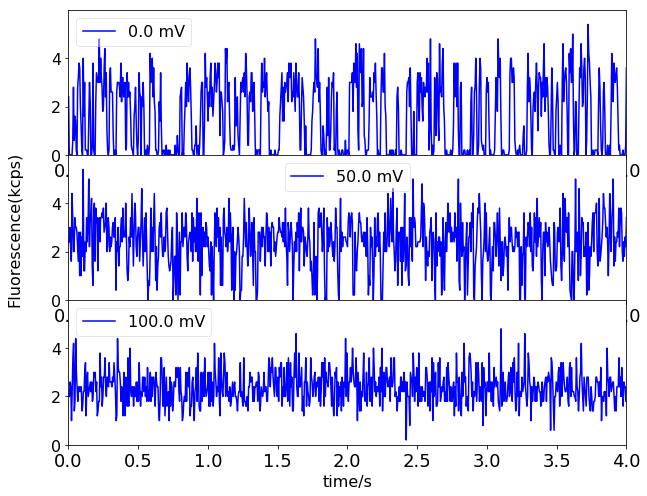

In [58]:
homedir_A4=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"
fig = time_trace_plot(foldername= homedir_A4, input_potential=[0, 50, 100], pointnumbers=[6], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=False)
os.chdir(parentdir)
savefig('SI_timetrace_Zn_part.pdf', dpi=300, transparent=True)

Time traces of $Copper$ Azurin labeled with ATTO 655 at different potential.

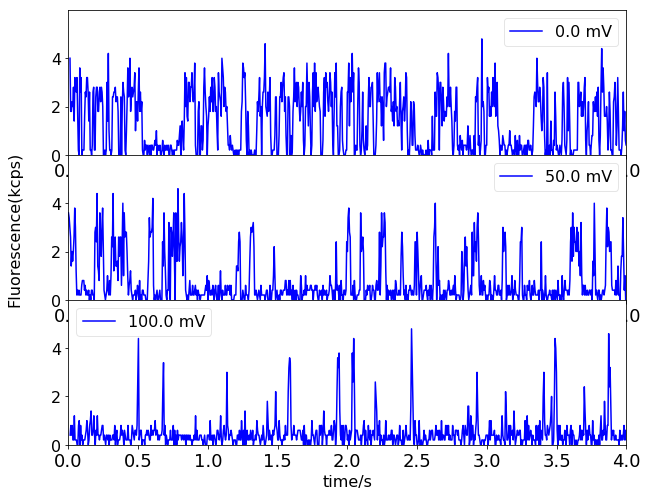

In [57]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160910_CuAzu655Ferri_asc_2ndtime/S83d10Sept16_CuAz655_0.1mMAsc_0.2mMFerri_0.11uW_A3/30sec_trace'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"

fig = time_trace_plot(foldername= folder, input_potential=[0, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=False)
os.chdir(parentdir)
savefig('SI_timetrace_Cu_part.pdf', dpi=300, transparent=True)

## Midpoint_hist: ZnAzurin

In [43]:
def Mid_potentials_slopem(folderpath=foldername, pointnumbers=range(20), plotting=True, max_pot=40, min_pot_num=1):
    timetrace_output = timetrace_outputs_folderwise(folderpath=folderpath, pointnumbers=pointnumbers, potentialist=potentialist)
    def nernst(x, a):
        '''x is potential
        a: E0/midpoint potential(parameter)
        returns ratio(t_oxd/t_red)'''
        return(10**((a-x) / 0.059))
    nernst_mod = Model(nernst)
    params_nernst = nernst_mod.make_params(a=0.02)
    def nernst_slopem(x, a, m):
        return(10**((a-x) / m))
    nernst_slopem_mod = Model(nernst_slopem)
    params_ner_slop = nernst_slopem_mod.make_params(a=0.02, m=0.059)
    columns_E0 = ['Point number', 'E0_fit', 'E0_err']
    columns_E0_m = ['Point number', 'E0_fit', 'E0_err', 'slope', 'slope_error']
    E0_list = pd.DataFrame(index=None, columns=columns_E0)
    E0_m_list = pd.DataFrame(index=None, columns=columns_E0_m)
    #--figure initiation----
    if plotting == True:
        fig, axes = plt.subplots(1, 2, figsize=(10,4))
        cmap = plt.get_cmap('hsv')#jet_r
        N=len(timetrace_output.columns.levels[0])
    for i in range(len(timetrace_output.columns.levels[0])):
        point = timetrace_output.columns.levels[0][i]
        point_output_tot = timetrace_output[point].dropna()
        point_output = point_output_tot[point_output_tot['Potential'] <= max_pot] #select a potential threshold
        point_output.reset_index(drop=True, inplace=True)
        if len(point_output)>min_pot_num:
            potential = point_output['Potential']
            t_onav = point_output['t_onav']
            t_onaverr = point_output['t_onaverr']
            t_offav = point_output['t_offav']
            t_offaverr = point_output['t_offaverr']
            t_ratio = point_output['t_ratio']
            t_ratioerr = point_output['t_ratioerr']
            E = potential*0.001 #converting to mV
            #--------fitting nernst----------------
            res_nernst = nernst_mod.fit(t_ratio, params_nernst, x=E)
            out_params = str((res_nernst.params['a'],'value'));
            E0 = res_nernst.best_values['a']
            E0_err = float(out_params.split('+/- ')[1].split(', bounds')[0]);
            #---------append to list---------
            E0_list_temp = pd.DataFrame([[point, E0, E0_err]], columns=columns_E0)
            E0_list=E0_list.append(E0_list_temp, ignore_index=True)
            #--------fitting nernst_slopem------
            res_nernst_slop = nernst_slopem_mod.fit(t_ratio, params_ner_slop, x=E)
            E0_m = res_nernst_slop.best_values['a']
            out_params = str((res_nernst_slop.params['a'],'value'));
            E0_m_err = float(out_params.split('+/- ')[1].split(', bounds')[0]);
            slope_m = res_nernst_slop.best_values['m']
            out_params_m = str((res_nernst_slop.params['m'],'value'));
            slope_m_err = float(out_params_m.split('+/- ')[1].split(', bounds')[0]);
            E0_m_list_temp = pd.DataFrame([[point, E0_m, E0_m_err, slope_m, slope_m_err]], columns=columns_E0_m)
            E0_m_list = E0_m_list.append(E0_m_list_temp, ignore_index=True)
            #-----plot------
            if plotting == True:
                color = cmap(float(i)/N)
                axes[0].errorbar(point_output_tot['Potential'], point_output_tot['t_ratio'],
                         yerr=point_output_tot['t_ratioerr'], fmt='o', color=color, label=point, ms=5)#plot raw outputs
                axes[0].plot(linspace(min(potential)-10, max(potential)+10), nernst(0.001*linspace(min(potential)-10, max(potential)+10), E0), color=color, linewidth=2.0)#color
                #plot(E*1000, nernst(E, *E0_fit), color=color, linewidth=2.0)

                
                axes[1].errorbar(point_output_tot['Potential'], point_output_tot['t_ratio'],
                         yerr=point_output_tot['t_ratioerr'], fmt='o', color=color, label=point, ms=5)#plot raw outputs
                axes[1].plot(linspace(min(potential)-10, max(potential)+10), nernst_slopem(0.001*linspace(min(potential)-10, max(potential)+10), E0_m, slope_m), color=color, linewidth=2.0)
                
                axes[0].set_xlim(-125, 60)
                axes[1].set_xlim(-125, 60)
                axes[0].set_ylim(0.01, 100)
                axes[1].set_ylim(0.01, 100)
                axes[0].set_yscale('log')
                axes[0].set_xlabel('$Potential [V]$', fontsize=20)
                axes[0].set_ylabel('$T_{OFF}/T_{ON}$', fontsize=20)
                axes[0].tick_params(axis='both', which='major', labelsize=16)
                axes[0].set_title(r'$E=E_0 + 0.059log(\frac{t_{off}}{t_{on}})$')
                axes[1].set_yscale('log')
                axes[1].set_xlabel('$Potential [V]$', fontsize=20)
                axes[1].set_ylabel('$T_{OFF}/T_{ON}$', fontsize=20)
                axes[1].tick_params(axis='both', which='major', labelsize=16)
                axes[1].set_title(r'$E=E_0 + m.log(\frac{t_{off}}{t_{on}})$')
                tight_layout()
    return(E0_list, E0_m_list)

### potential vs ratio

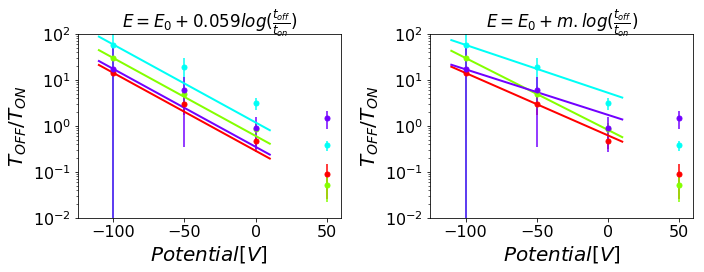

In [50]:
folder=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4'
E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=[1, 10, 11, 12], plotting=True, max_pot=25, min_pot_num=1)
# legend()
os.chdir(parentdir)
savefig('SI_potential_vs_ratio_ZnAzurin.pdf', dpi=300, transparent=True)

### potential histogram

In [7]:
S82d9Sept16_ZnAzu655_A3_30s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/30sec_trace';
S82d9Sept16_ZnAzu655_A3_200s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A3/200sec_trace';
S82d9Sept16_ZnAzu655_A4 = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc/S82d9Sept16_0.11uW639nm_ZnAzu655_0.1mMAsc_0.2mMFerri_A4';
# S107d1May17_ZnAzu655_SM_A1 = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_SM/S107d1May17_635_ZnAzu655_SM_A1';
# S107d1May17_ZnAzu655_SM_A2_30s = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_SM/S107d1May17_635_ZnAzu655_SM_A2_30s';
allfolders = [S82d9Sept16_ZnAzu655_A3_30s, S82d9Sept16_ZnAzu655_A3_200s, S82d9Sept16_ZnAzu655_A4];
E0_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err'])
E0_m_array = pd.DataFrame(index=None, columns=['Point number', 'E0_fit', 'E0_err', 'slope', 'slope_error'])
for folder in allfolders:
    E0_list, E0_m_list = Mid_potentials_slopem(folderpath=folder, pointnumbers=range(50), plotting=False, max_pot=25)
    E0_array = E0_array.append(E0_list, ignore_index=True)
    E0_m_array = E0_m_array.append(E0_m_list, ignore_index=True)

em.plot file of Point_6 with potential 100.0 doesnt exist


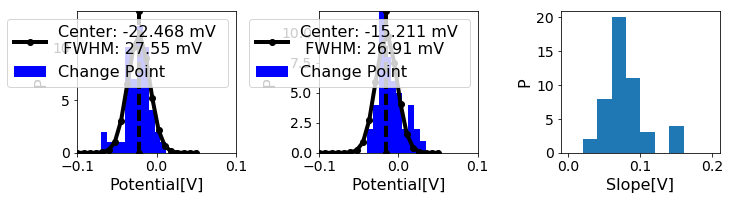

In [52]:
#MIDPOTENTIAL HISTGRAM FITTING
def plot_midpoint_hist(E0_array, E0_m_array):
    fig = plt.figure(figsize=(10, 3))
    # plt.figure()
    mpl.rcParams["font.family"] = "sans-serif"
    mpl.rcParams["font.size"] = "14"
    min_range = -0.1
    max_range = 0.05
    range_fit = [min_range, max_range]
    bins = 20
    bin_centers_on = linspace(range_fit[0], range_fit[1], bins)
    x=linspace(range_fit[0], range_fit[1], 100)# for a smooth fitting plot include more points

    from scipy.interpolate import interp1d
    from lmfit.models import GaussianModel
    mod = GaussianModel()
    # params = gmodel.make_params(center=0.01, amplitude=10, sigma=0.02)
    #Change point--------------------------
    ax1 = fig.add_subplot(1,3,1)#2,2,1
    n,bins_on1,patches = ax1.hist(E0_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder
    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax1.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax1.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax1.set_xlim(-0.1, 0.1)
    ax1.set_ylim(0,height+0.2*height)
    ax1.set_ylabel('P', fontsize=16)
    ax1.set_xlabel('Potential[V]', fontsize=16)
    ax1.legend(fontsize=16)
    #-----
    ax2 = fig.add_subplot(1,3,2)
    n,bins_on1,patches = ax2.hist(E0_m_array['E0_fit'], bins = bins, range=range_fit, color='b', label='Change Point')#E0_list from running all folder

    y=n; x=bin_centers_on;
    result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
    temp =result1.best_values
    FWHM = 2*temp['sigma']*1000 #V
    cent = temp['center']*1000#eV
    amp = temp['amplitude']

    ax2.plot(x, result1.best_fit, '-ko', lw=4, label='Center: %.3f mV \n FWHM: %.2f mV' %(cent, FWHM))
    amp = temp['amplitude']
    height = 0.3989423*amp/max(1.e-15, temp['sigma'])
    ax2.plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

    ax2.set_xlim(-0.1, 0.1)
    ax2.set_ylim(0,height+0.2*height)
    ax2.set_ylabel('P', fontsize=16)
    ax2.set_xlabel('Potential[V]', fontsize=16)
    ax2.legend(fontsize=16)
    #-----
    ax3 = fig.add_subplot(1,3,3)
    n,bins_on1,patches = ax3.hist(E0_m_array['slope'], bins = 10, range=(0, 0.2))#, range=range_fit, color='b', label='Change Point'
    # ax3.plot(E0_m_array['E0_fit']*1000, E0_m_array['slope'], )
    # ax3.set_xlim(-0.1, 0.1)
    # ax3.set_ylim(0,height+0.2*height)
    ax3.set_ylabel('P', fontsize=16)
    ax3.set_xlabel('Slope[V]', fontsize=16)
    # ax3.legend(fontsize=16)

    fig.tight_layout()
    # os.chdir(homedir)
    # fig.savefig('/home/biswajit/Pictures/canters_temp/MidpointPotential_distribution.pdf', dpi=300, transparent=True)
    # figure()
    # result.plot()
    return()
plot_midpoint_hist(E0_array, E0_m_array)
os.chdir(parentdir)
savefig('SI_potential_histogram_Zn.pdf', dpi=300, transparent=True)

## Ton_Toff histogram: 1D

In [ ]:
dira = [r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201609/20160909_ZnAzuA655_Ferri_Asc']
t_ons, t_offs = histogram_on_off_all_folder(allfolders= dira, input_potential=[0], pointnumbers=range(100), 
                                        bins_on=200, range_on=[0, 0.1], bins_off=200, range_off=[0, 0.2], plotting=True)

## Ton_Toff histogram: 2D

Number of on events: 7492
Number of off events: 7482


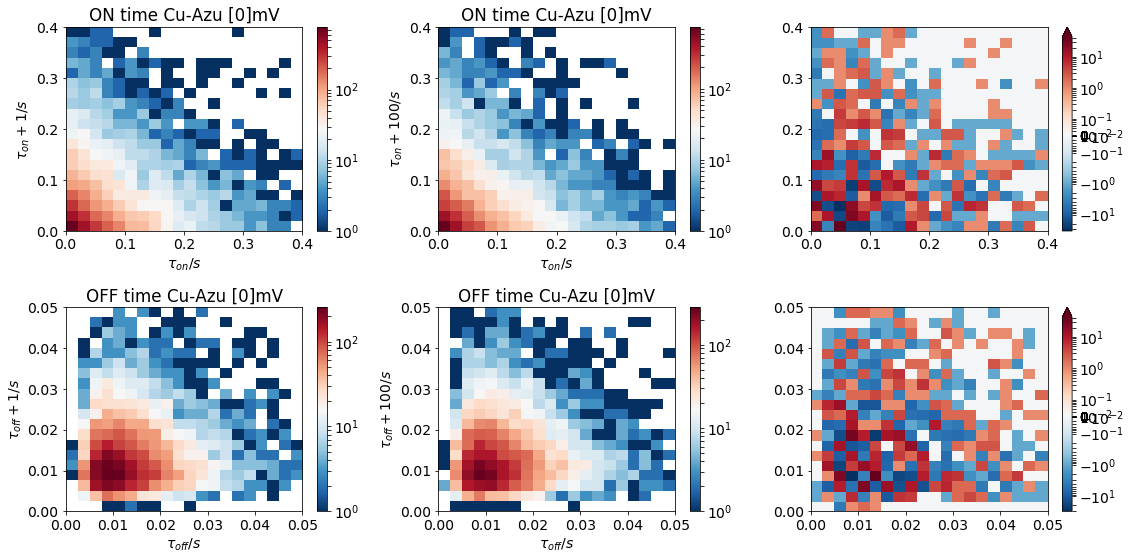

In [29]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';#data directory
C_on_diff, C_off_diff = hist2D_on_off(foldername=folder_longtraces, input_potential=[0], pointnumbers=range(50), bins_on=20, range_on=[0, 0.4], bins_off=20, range_off=[0, 0.05], x_shift=100, plots=True)
os.chdir(parentdir)
savefig('SI_on_off_2D_histogram_Zn.pdf', dpi=300, transparent=True)